# K-Nearest Neighbors Regressor - A non-linear problem

### Importing the relevant libraries

In [1]:
# This method will help us split the data into training and testing datasets
from sklearn.model_selection import train_test_split

# This class will help us create a KNN regression model
from sklearn.neighbors import KNeighborsRegressor

# This class will help us create a Linear regression model
from sklearn.linear_model import LinearRegression

# This method will help us calculate the mean squared error for each model
from sklearn.metrics import mean_squared_error

# This library will help us organize our data
import pandas as pd

# We import the sine function which will help us generate our non-linear data
from math import sin

# Import the numpy library
import numpy as np

# These libraries will help us visualize the results
import matplotlib.pyplot as plt
import seaborn as sns

### Defining the regression

In [2]:
# Create a function that generates a random non-linear dataset
def non_linear_regression(n_samples, noise = 0, random_state = None):
    
    if random_state:
        np.random.seed(random_state)

    uni = lambda n : np.random.uniform(-2, 2, n) #  Generate n uniform random numbers between -2 and 2.
    add_noise =  lambda  n : np.random.normal(0, 1, n) # Generates n random numbers from a normal distribution with mean 0 and standard deviation 1.
    
    x = []
    x = uni(n_samples)
    x.sort()
    
    y_raw = [i**2 + sin(5*i) for i in x]
    y = y_raw + noise * np.std(y_raw) * add_noise(n_samples) # Add noise to the data by 
        
    return x, y

### Display the data with and without noise

In [3]:
# Generate data without noise
inputs_no_noise, target_no_noise = non_linear_regression(300, 0, 365)

# Using the same random state as above, generate the data with some noise
inputs, target = non_linear_regression(300, 0.5, 365)

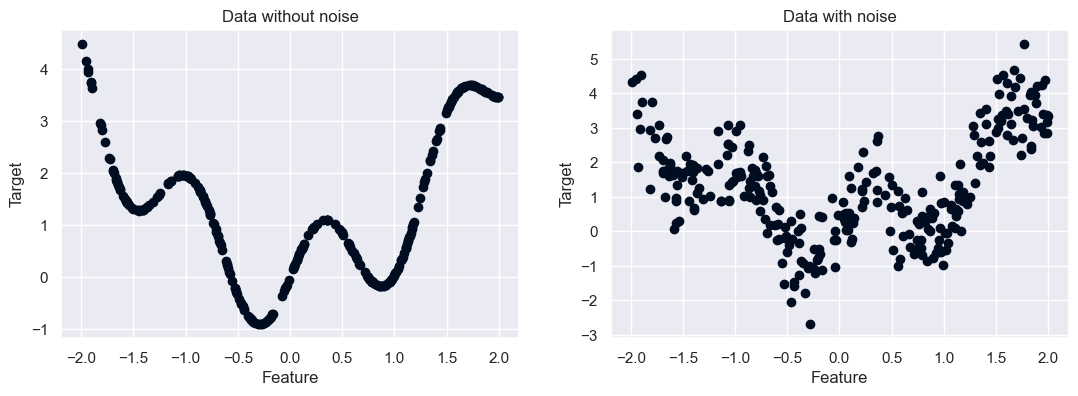

In [5]:
# Set the seaborn visualization
sns.set()

# Create a placeholder for 2 subplots aligned horizontally
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13,4))

# Plot the noiseless data, choose the color of the datapoints
# Set a title and axes labels
ax1.scatter(inputs_no_noise, target_no_noise, color = '#000C1F')
ax1.set_title('Data without noise')
ax1.set_xlabel('Feature')
ax1.set_ylabel('Target')

# Plot the noisy data, choose the color of the datapoints
# Set a title and axes labels
ax2.scatter(inputs, target, color = '#000C1F')
ax2.set_title('Data with noise')
ax2.set_xlabel('Feature')
ax2.set_ylabel('Target');

### Split the data into training and testing sets. Visualize both datasets

In [6]:
# Split the data into training and testing sets such that 20% of all points are dedicated to testing.
# Set a random state so that the split is reproducible.
x_train, x_test, y_train, y_test = train_test_split(inputs, 
                                                    target, 
                                                    test_size = 0.2, 
                                                    random_state = 365)

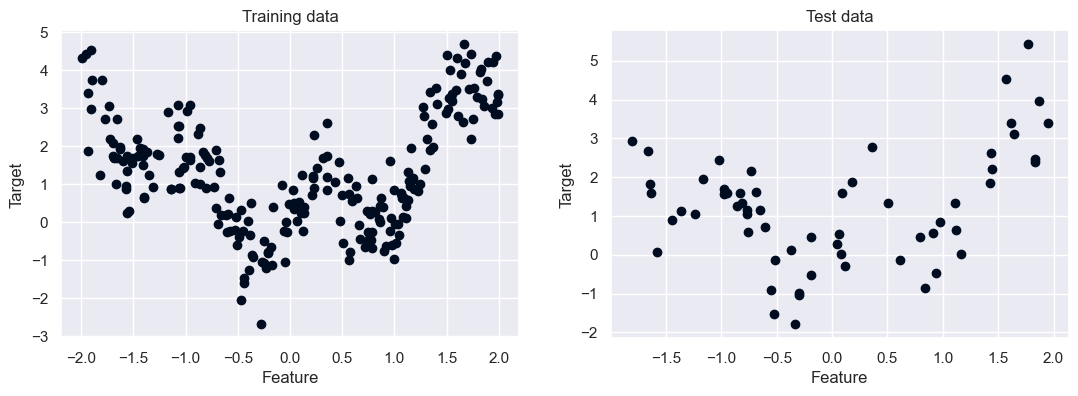

In [7]:
# Set the seaborn visualization
sns.set()

# Create a placeholder for two subplots which are aligned horizontally. Set a specific size for the figure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13,4))

# Plot the training data
ax1.scatter(x_train, y_train, color = '#000C1F')
ax1.set_title('Training data')
ax1.set_xlabel('Feature')
ax1.set_ylabel('Target')

# Plot the test data
ax2.scatter(x_test, y_test, color = '#000C1F')
ax2.set_title('Test data')
ax2.set_xlabel('Feature')
ax2.set_ylabel('Target');

## Evaluating Regression Models

**1. Mean Absolute Error (MAE):**
* MAE measures the average magnitude of the errors between the predicted and the actual values, without considering their direction.
* Formula:  $\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|$
* A lower MAE value indicates better model performance.

**2. Mean Squared Error (MSE):**
* MSE measures the average of the squares of the errors, which is the average squared difference between the estimated values and the actual value.
* Formula: $ \text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$
* It is more sensitive to outliers than MAE. A lower MSE value indicates better model performance.

**3. Root Mean Squared Error (RMSE):**
* RMSE is the square root of the mean squared error, representing the standard deviation of the residuals.
* Formula: $ \text{RMSE} = \sqrt{\text{MSE}} $
* Like MSE, it is sensitive to outliers and gives a sense of the magnitude of the errors. A lower RMSE value indicates better model performance.

**4. R-Squared (Coefficient of Determination):**
* R-squared represents the proportion of the variance in the dependent variable that is predictable from the independent variables.
* Formula:  $R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}$ 
* It ranges from 0 to 1, with higher values indicating a better fit of the model to the data.

**5. Adjusted R-Squared:**
* Adjusted R-squared adjusts the R-squared value based on the number of predictors in the model.
* In multiple regression models, adding more independent variables can increase the R-squared value, even if those variables are not significantly contributing to the explanatory power of the model. This is because R-squared measures the proportion of variance explained by the model, and adding more variables usually captures more variance, by chance if not by actual explanatory power.
* Formula: $ \text{Adjusted } R^2 = 1 - (1 - R^2) \times \frac{n - 1}{n - p - 1} $ where $ n $ is the number of observations and $ p $ is the number of predictors.
* It is used to compare the goodness of fit for models with a different number of independent variables. A higher adjusted R-squared value indicates a better model fit.


## Fit a linear regression and multiple KNN-regressions. Calculate the MSE

 * fitting data with only one feature (like in this case), you need to reshape the data so that it becomes a 2D array with one column. The -1 in the reshape method indicates that the number of rows is unspecified, allowing numpy to automatically determine the appropriate number of rows.

### Linear regression

In [8]:
# Create an intance of the Linear regression class
reg_lin = LinearRegression()

# Fit the model to the training data.
# In sklearn, when fitting data with only 1 feature, the following reshaping should be applied.
reg_lin.fit(x_train.reshape(-1, 1), y_train)

# Make predictions on the test data.
# The same reshaping should be applied.
y_pred_lin = reg_lin.predict(x_test.reshape(-1, 1))

In [10]:
# assess the performance of the model using the test set. Report the  MSE and R2 score.
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate the metrics
mae = mean_absolute_error(y_test, y_pred_lin)
mse = mean_squared_error(y_test, y_pred_lin)
rmse = np.sqrt(mse)
r_squared = r2_score(y_test, y_pred_lin)

# Adjusted R-squared calculation
# Replace 'n_features' with the actual number of features in your model
n = len(y_test)  # Number of observations
p = 1   # Number of independent variables
adjusted_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - p - 1)

# Report the metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (Coefficient of Determination): {r_squared}")
print(f"Adjusted R-squared: {adjusted_r_squared}")



Mean Absolute Error (MAE): 1.1062236393883198
Mean Squared Error (MSE): 1.9480883497952635
Root Mean Squared Error (RMSE): 1.3957393559670312
R-squared (Coefficient of Determination): 0.06423855911525134
Adjusted R-squared: 0.04810474116896257


### kNN Regressor

In [11]:
# Choose a maximum number of nearest neighbors and add 1. 
# That is, choose the value 81 to set a maximum value of 80.
# The reason we add the 1 is because this number is then used in a range() function in the following way:
# range(1, k)
# The range() function includes the first number but excludes the second one.
k = 81

# Create an array where all mean-squared error (MSE) values from the linear regression will be stored.
mse_lin = []

# Calculate the MSE value for the linear regression
mse_lin = mean_squared_error(y_test, y_pred_lin)

# The MSE value calculated above is the same for all values of K. 
# Therefore, we create an array storing that MSE value (k-1) many times.
# This will later be used to plot the MSE value versus the number of nearest neighbors.
mse_lin = [mse_lin]*(k-1)

# Create an array where all MSE values from the KNN regressions will be stored.
mse_knn = []

# Loop through all K-values
for i in range(1, k):
    
    # Create an instance of the KNN regression for the specified value of K
    reg_knn = KNeighborsRegressor(n_neighbors = i)
    
    # Fir the training data to the model
    reg_knn.fit(x_train.reshape(-1, 1), y_train)
    
    # Make predictions on the test data
    y_pred_knn = reg_knn.predict(x_test.reshape(-1, 1))
    
    # Calculate the MSE value for this regression and store it in the array
    mse_knn.append(mean_squared_error(y_test, y_pred_knn))

### Plot the MSE versus the number of neighbors

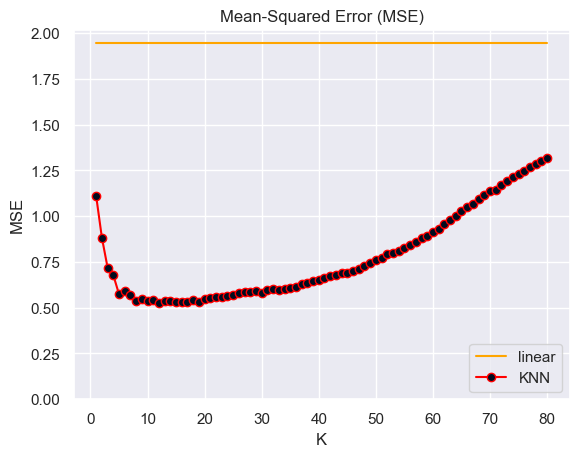

In [12]:
# Set the seaborn visualization
sns.set()

# Create a placeholder for a figure
fig, ax = plt.subplots()

# Plot the MSE of the linear regression versus the value of K.
# Since the linear regression is not affected by the value of K, the output is a straight line.
# Choose a color.
# Choose a label which will describe the line in the legend
plt.plot(list(range(1, k)), 
         mse_lin, 
         color = 'orange', 
         label = 'linear')

# Plot the MSE of the KNN regressions versus the value of K.
# Choose a color for the line.
# Use a marker to show the values of K.
# Choose a color for the marker
# Choose a label which will describe the line in the legend
plt.plot(list(range(1, k)), 
         mse_knn, 
         color = 'red', 
         marker = 'o', 
         markerfacecolor = '#000C1F',
         label = 'KNN')

# Place the legend in the lower right corner
ax.legend(loc='lower right')

# Set a title and axes labes
ax.set_title('Mean-Squared Error (MSE)')
ax.set_xlabel('K')
ax.set_ylabel('MSE')

# Set a minimum value of the y-axis
plt.ylim(0);

### Make predictions only for K = 1, 7, and 80

In [13]:
# Create a list to store the predictions from 3 KNN regressions
y_pred_knn = []

# Create 3 KNN regressions with K = 1, 7, and 80.
# Fit the model to the training data
# Make predictions on the test data
for i in [1, 7, 80]:
    reg_knn = KNeighborsRegressor(n_neighbors = i)
    reg_knn.fit(x_train.reshape(-1, 1), y_train)
    y_pred_knn.append(reg_knn.predict(x_test.reshape(-1, 1)))

### Sort the data according to the test features

In [14]:
# In order to visualize the regressions well, we need to sort the data with respect to the test features

df = pd.DataFrame(data = {'x_test':list(x_test.flatten()), 
                          'y_test':list(y_test.flatten()), 
                          'y_pred_lin':list(y_pred_lin.flatten()), 
                          'y_pred_knn-1':list(y_pred_knn[0].flatten()), 
                          'y_pred_knn-7':list(y_pred_knn[1].flatten()), 
                          'y_pred_knn-80':list(y_pred_knn[2].flatten())})

# To check how the visualization looks like without sorting the data, comment out the line below,
# run the cell and then run the next 2 cells.
df = df.sort_values(by = ['x_test'])

x_test_sorted = df['x_test'].tolist()
y_test_sorted = df['y_test'].tolist()
y_pred_lin_sorted = df['y_pred_lin'].tolist()
y_pred_knn1_sorted = df['y_pred_knn-1'].tolist()
y_pred_knn7_sorted = df['y_pred_knn-7'].tolist()
y_pred_knn80_sorted = df['y_pred_knn-80'].tolist()

### Plot the regressions on top of the test data

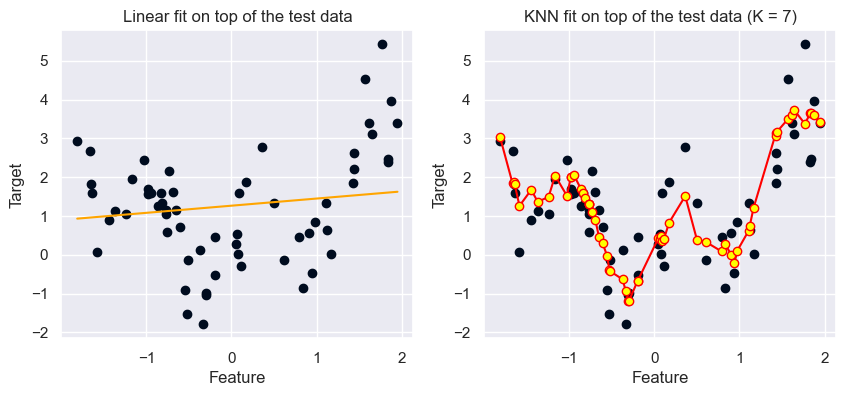

In [15]:
# Set the seaborn visualization
sns.set()

# Create a placeholder for two figures aligned horizontally
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))

# Plot the sorted test data on the left figure
ax1.scatter(x_test_sorted, 
            y_test_sorted, 
            color = '#000C1F')

# Plot the fit from the linear regression
ax1.plot(x_test_sorted, 
         y_pred_lin_sorted, 
         color = 'orange')

# Add a title and axes labels to the left figure
ax1.set_title('Linear fit on top of the test data')
ax1.set_xlabel('Feature')
ax1.set_ylabel('Target')

# Plot the sorted test data on the right figure
ax2.scatter(x_test_sorted, 
            y_test_sorted, 
            color = '#000C1F')

# Plot the fit from the KNN regression (K = 7)
ax2.plot(x_test_sorted, 
         y_pred_knn7_sorted, 
         color = 'red', 
         marker = 'o', 
         markerfacecolor = 'yellow')

# Add a title and axes labels to the left figure
ax2.set_title('KNN fit on top of the test data (K = 7)')
ax2.set_xlabel('Feature')
ax2.set_ylabel('Target');

### Plot the regressions for K = 1, 7, and 80 on top of the noiseless data

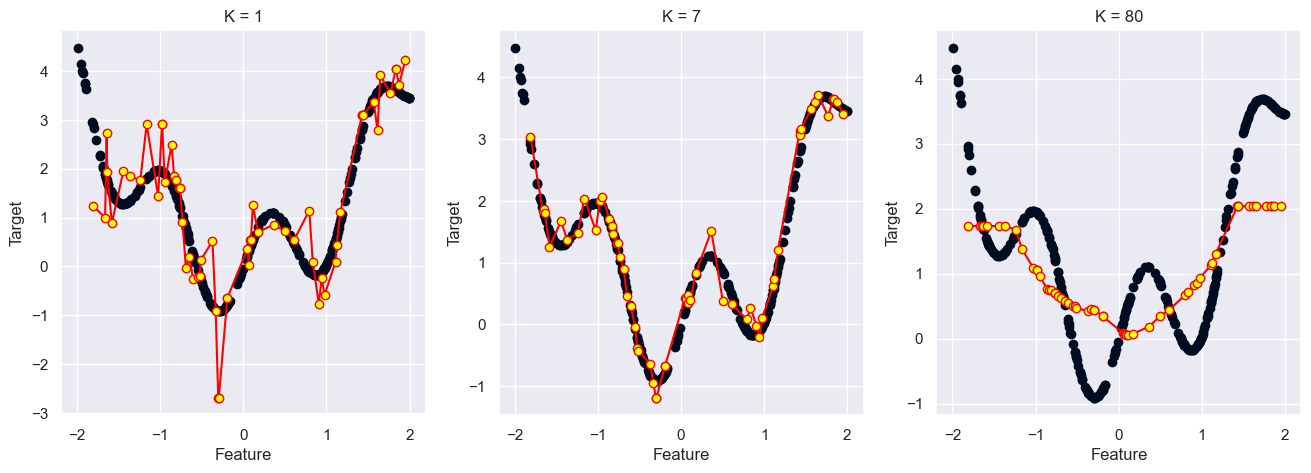

In [16]:
# Set the seaborn visualization
sns.set()

# Create a placeholder for 3 figures aligned horizontally
fig, (ax1,ax2, ax3) = plt.subplots(1,3, figsize=(16, 5))

# Plot the noiseless data on all 3 figures
ax1.scatter(inputs_no_noise, target_no_noise, color = '#000C1F')
ax2.scatter(inputs_no_noise, target_no_noise, color = '#000C1F')
ax3.scatter(inputs_no_noise, target_no_noise, color = '#000C1F')

# Plot the fit from a KNN regression (K = 1)
ax1.plot(x_test_sorted, 
         y_pred_knn1_sorted, 
         color = 'red',
         marker = 'o', 
         markerfacecolor = 'yellow')
ax1.set_title('K = 1')
ax1.set_xlabel('Feature')
ax1.set_ylabel('Target')

# Plot the fit from a KNN regression (K = 7)
ax2.plot(x_test_sorted, 
         y_pred_knn7_sorted, 
         color = 'red',
         marker = 'o', 
         markerfacecolor = 'yellow')
ax2.set_title('K = 7')
ax2.set_xlabel('Feature')
ax2.set_ylabel('Target')

# Plot the fit from a KNN regression (K = 80)
ax3.plot(x_test_sorted, 
         y_pred_knn80_sorted, 
         color = 'red',
         marker = 'o', 
         markerfacecolor = 'yellow')
ax3.set_title('K = 80')
ax3.set_xlabel('Feature')
ax3.set_ylabel('Target');

## ACKNOWLEDGEMENTS

Taken from last year's lab

### Mention:
- Normalization, what algorithms are robust to the range of variables?